Testing preprocessing for patient: 16406M
✅ Preprocessing function executed successfully.

--- Verification Checks ---
✅ Shape Check Passed: (128, 128, 128)
✅ Value Range Check Passed (Min: 0.714, Max: 1.000)

--- Visualizing Center Slice ---


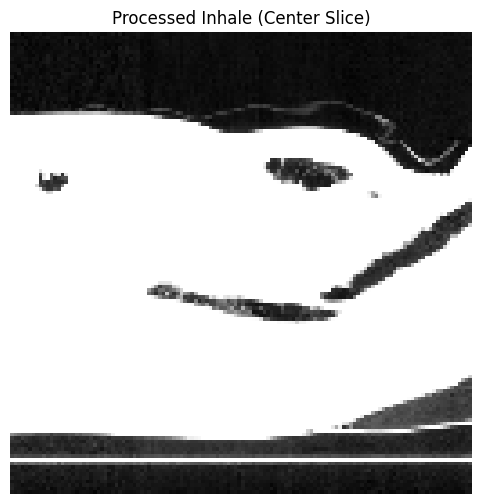

In [5]:
import sys
from pathlib import Path
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import importlib

# --- Setup Paths and Imports ---
project_root = Path.cwd() 
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

# --- Force reload the module to ensure changes are picked up ---
import preprocess_data
importlib.reload(preprocess_data)
from preprocess_data import process_patient_pair, normalize_scan_hu

# --- Configuration ---
RAW_DATA_ROOT = Path("/mnt/hot/public/COPDGene-1")
PROCESSED_DATA_DIR = Path("/mnt/hot/public/Akul/exhale_pred_data")
TARGET_SHAPE = (128, 128, 128)

# --- Select a Patient to Test ---
test_patient_id = '16406M'

# --- Run Single Patient Processing ---
print(f"Testing preprocessing for patient: {test_patient_id}")
(PROCESSED_DATA_DIR / "inhale").mkdir(parents=True, exist_ok=True)
(PROCESSED_DATA_DIR / "exhale").mkdir(parents=True, exist_ok=True)

error = process_patient_pair(test_patient_id)
if error:
    print(f"🛑 Test Failed: {error}")
else:
    print("✅ Preprocessing function executed successfully.")
    
    # --- Verification Step ---
    try:
        processed_inhale_path = PROCESSED_DATA_DIR / "inhale" / f"{test_patient_id}.npy"
        inhale_arr = np.load(processed_inhale_path)
        
        print("\n--- Verification Checks ---")
        assert inhale_arr.shape == TARGET_SHAPE, f"Shape mismatch: {inhale_arr.shape}"
        print(f"✅ Shape Check Passed: {inhale_arr.shape}")
        
        min_val, max_val = inhale_arr.min(), inhale_arr.max()
        if not (np.isfinite(min_val) and np.isfinite(max_val) and -0.01 <= min_val and max_val <= 1.01):
            raise ValueError(f"Value range is incorrect. Min: {min_val}, Max: {max_val}")

        print(f"✅ Value Range Check Passed (Min: {min_val:.3f}, Max: {max_val:.3f})")
        
        # --- Visualization Step ---
        print("\n--- Visualizing Center Slice ---")
        fig, ax = plt.subplots(1, 1, figsize=(6, 6))
        ax.imshow(inhale_arr[TARGET_SHAPE[0] // 2, :, :], cmap='gray')
        ax.set_title(f'Processed Inhale (Center Slice)')
        ax.axis('off')
        plt.show()

    except Exception as e:
        print(f"🛑 An error occurred during verification: {e}")